# Gradient Boosting
"Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network." - https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/

"Let’s start by understanding Boosting! Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models." - https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

"Gradient boosting is an effective machine learning algorithm and is often the main, or one of the main, algorithms used to win machine learning competitions (like Kaggle) on tabular and similar structured datasets."

## QSAR Dataset

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

### Holdout

In [2]:
data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
    
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [3]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.918
Accuracy score (Test): 0.917

Learning rate:  0.075
Accuracy score (Training): 0.919
Accuracy score (Test): 0.918

Learning rate:  0.1
Accuracy score (Training): 0.925
Accuracy score (Test): 0.924

Learning rate:  0.25
Accuracy score (Training): 0.932
Accuracy score (Test): 0.930

Learning rate:  0.5
Accuracy score (Training): 0.936
Accuracy score (Test): 0.930

Learning rate:  0.75
Accuracy score (Training): 0.937
Accuracy score (Test): 0.927

Learning rate:  1
Accuracy score (Training): 0.927
Accuracy score (Test): 0.921



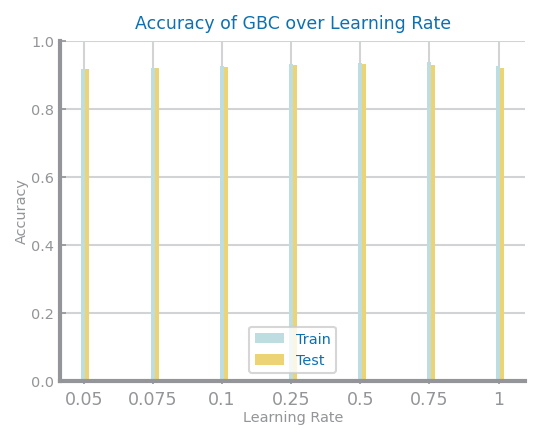

In [4]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_l_acc < gb_clf.score(X_test, y_test):
        best_l_acc = gb_clf.score(X_test, y_test)
        best_l = learning_rate

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Number of Estimators:  25
Accuracy score (Training): 0.939
Accuracy score (Test): 0.934

Number of Estimators:  50
Accuracy score (Training): 0.950
Accuracy score (Test): 0.930

Number of Estimators:  75
Accuracy score (Training): 0.956
Accuracy score (Test): 0.930

Number of Estimators:  100
Accuracy score (Training): 0.962
Accuracy score (Test): 0.932

Number of Estimators:  150
Accuracy score (Training): 0.973
Accuracy score (Test): 0.925

Number of Estimators:  200
Accuracy score (Training): 0.977
Accuracy score (Test): 0.924

Number of Estimators:  300
Accuracy score (Training): 0.989
Accuracy score (Test): 0.926



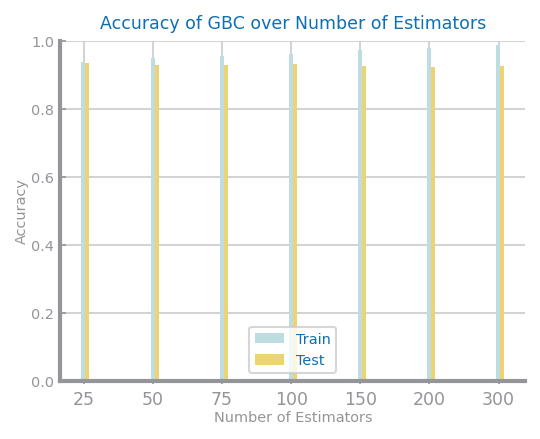

In [5]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Number of Estimators: ", no_estimators)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_e_acc < gb_clf.score(X_test, y_test):
        best_e_acc = gb_clf.score(X_test, y_test)
        best_e = no_estimators

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score (Training): 0.939
Accuracy score (Test): 0.934

Max Depth:  5
Accuracy score (Training): 0.988
Accuracy score (Test): 0.918

Max Depth:  6
Accuracy score (Training): 0.997
Accuracy score (Test): 0.922



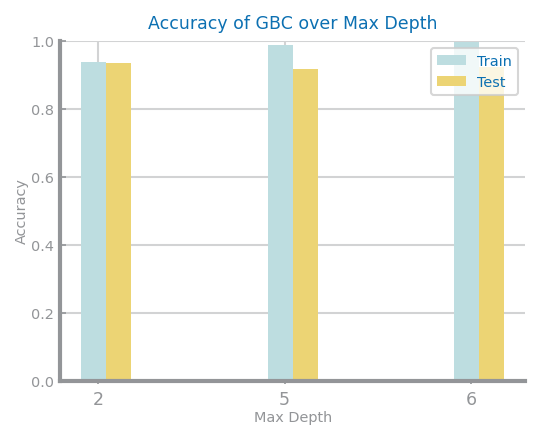

In [6]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", depth)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_d_acc < gb_clf.score(X_test, y_test):
        best_d_acc = gb_clf.score(X_test, y_test)
        best_d = depth

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final

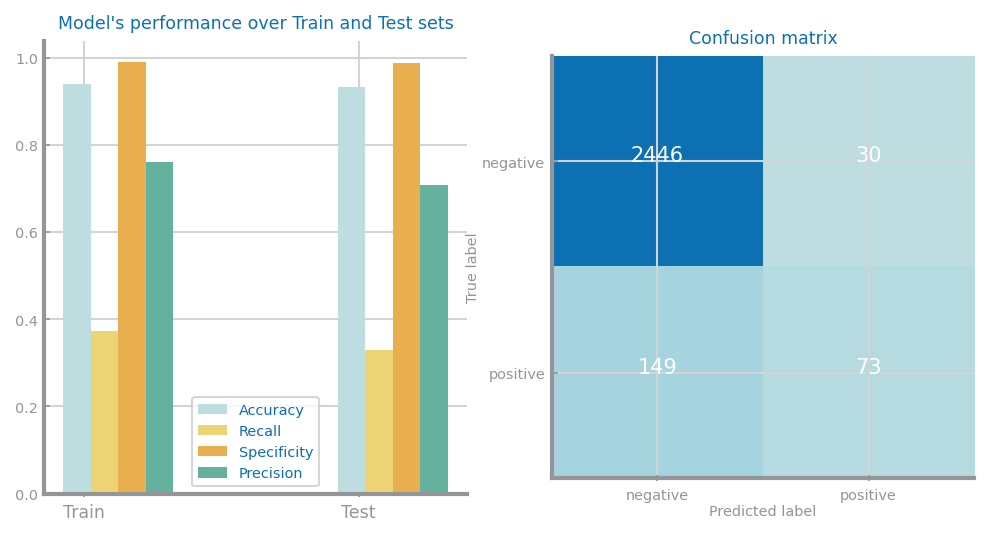

In [7]:
gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [8]:
data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
    
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

In [9]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.917

Learning rate:  0.075
Accuracy score: 0.917

Learning rate:  0.1
Accuracy score: 0.921

Learning rate:  0.25
Accuracy score: 0.927

Learning rate:  0.5
Accuracy score: 0.929

Learning rate:  0.75
Accuracy score: 0.927

Learning rate:  1
Accuracy score: 0.919



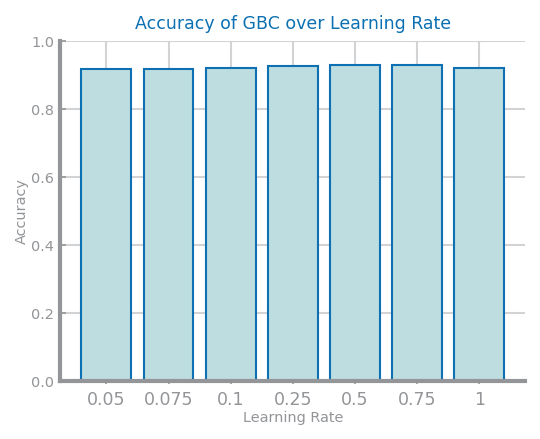

In [10]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_l_acc < scores.mean():
        best_l_acc = scores.mean()
        best_l = learning_rate
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  25
Accuracy score: 0.930

NUmber of Estimators:  50
Accuracy score: 0.932

NUmber of Estimators:  75
Accuracy score: 0.935

NUmber of Estimators:  100
Accuracy score: 0.931

NUmber of Estimators:  150
Accuracy score: 0.933

NUmber of Estimators:  200
Accuracy score: 0.936

NUmber of Estimators:  300
Accuracy score: 0.933



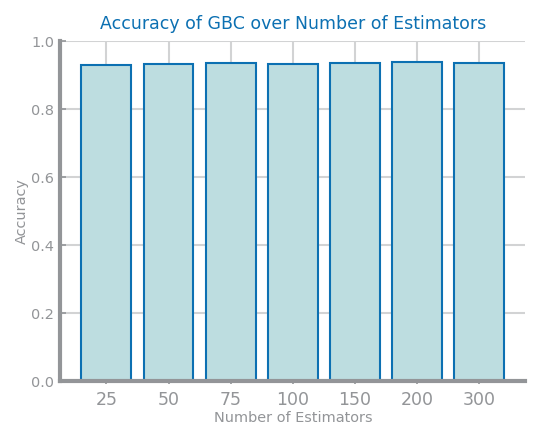

In [11]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", no_estimators)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_e_acc < scores.mean():
        best_e_acc = scores.mean()
        best_e = no_estimators

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score: 0.937

Max Depth:  5
Accuracy score: 0.930

Max Depth:  6
Accuracy score: 0.928



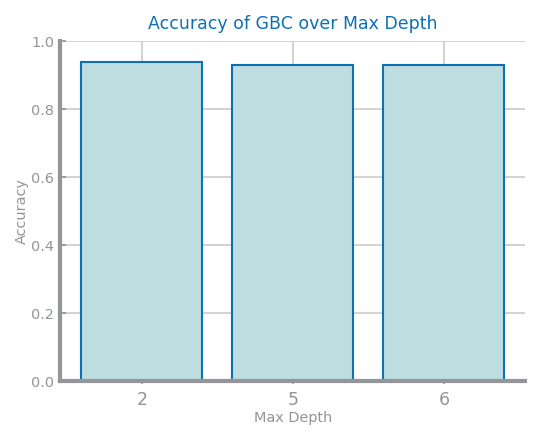

In [12]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", depth)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_d_acc < scores.mean():
        best_d_acc = scores.mean()
        best_d = depth

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.5

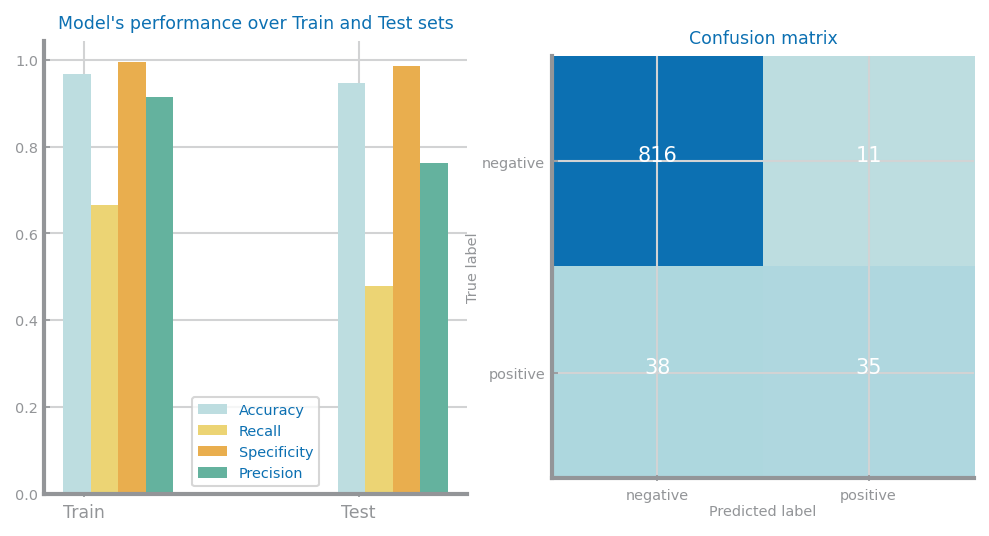

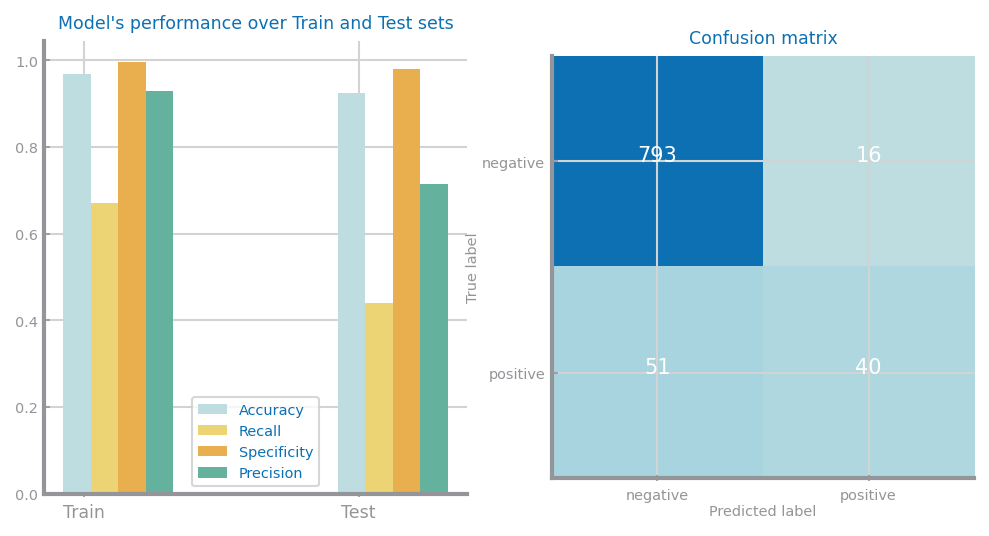

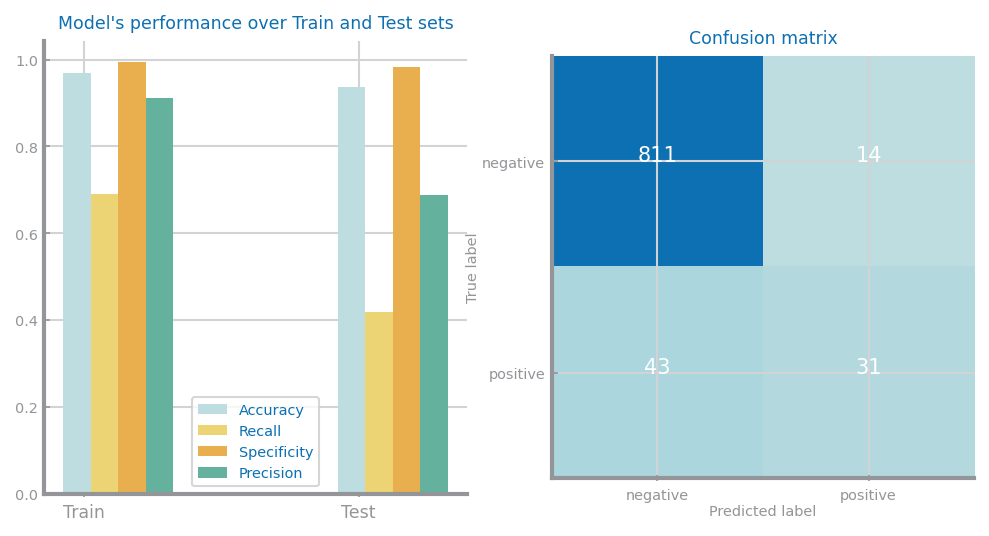

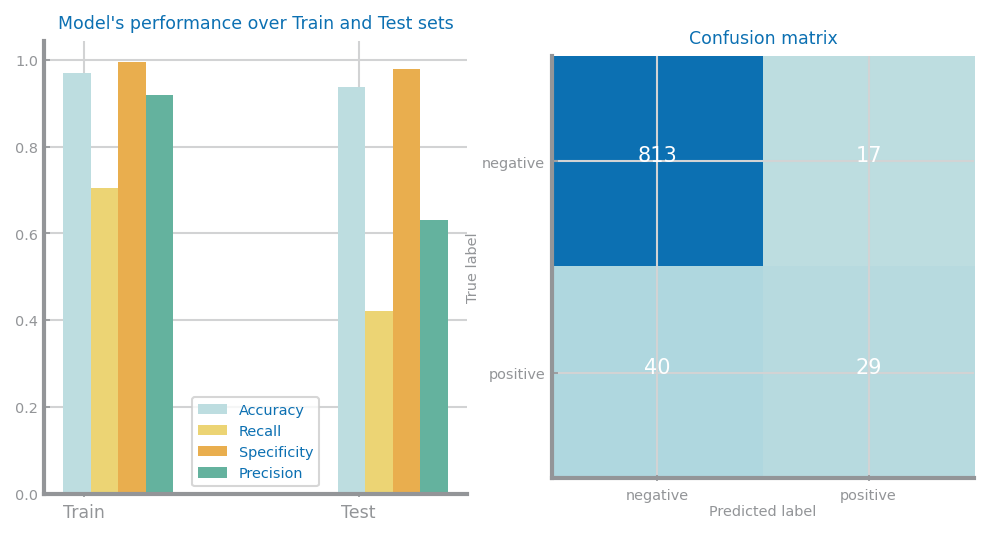

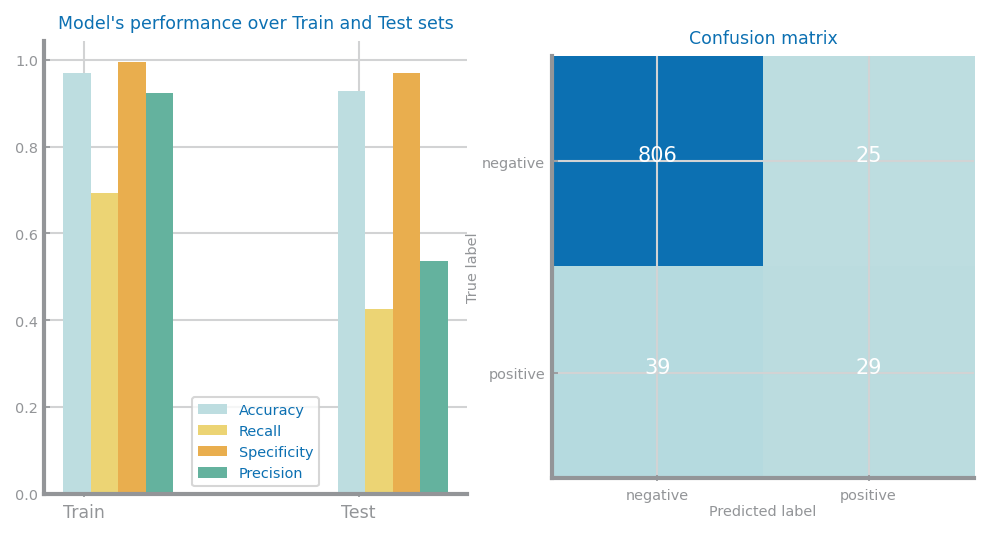

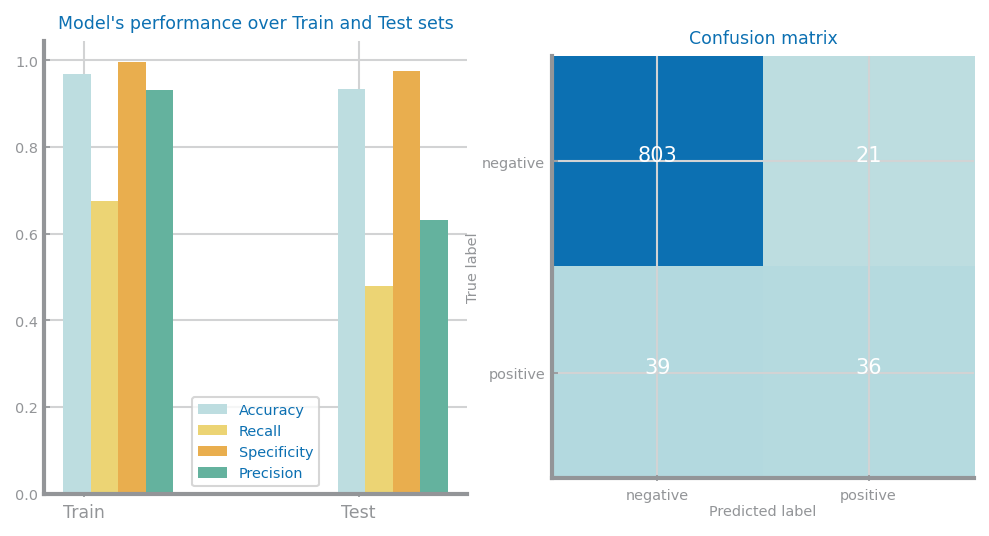

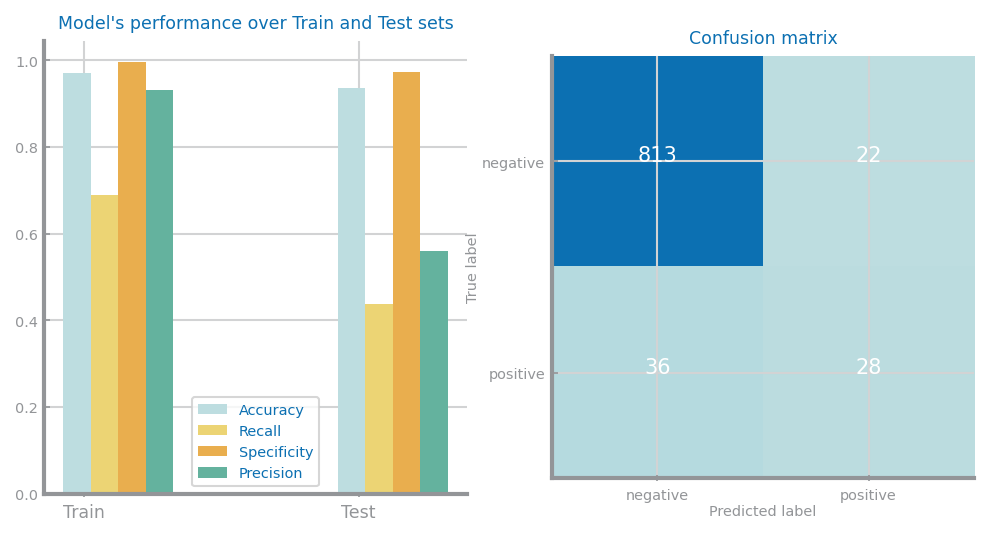

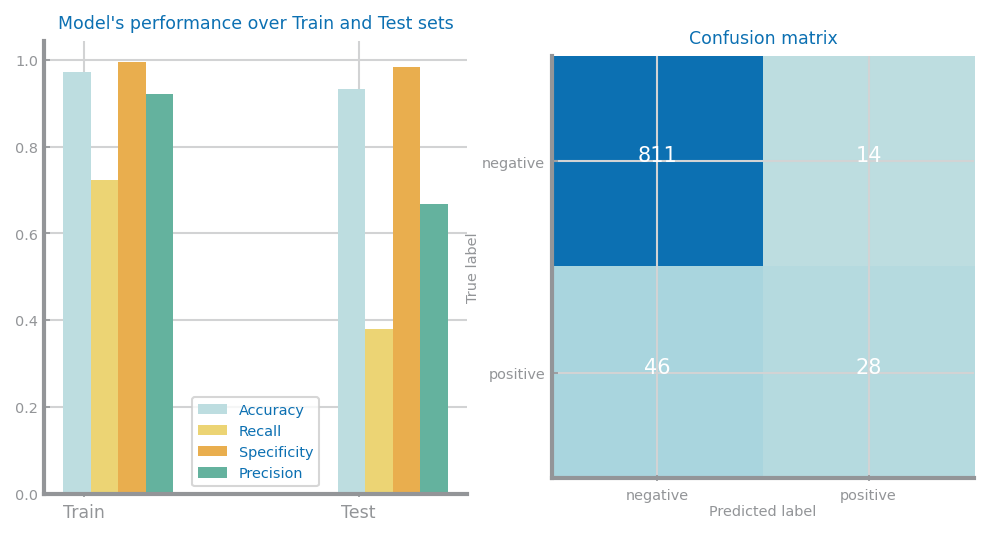

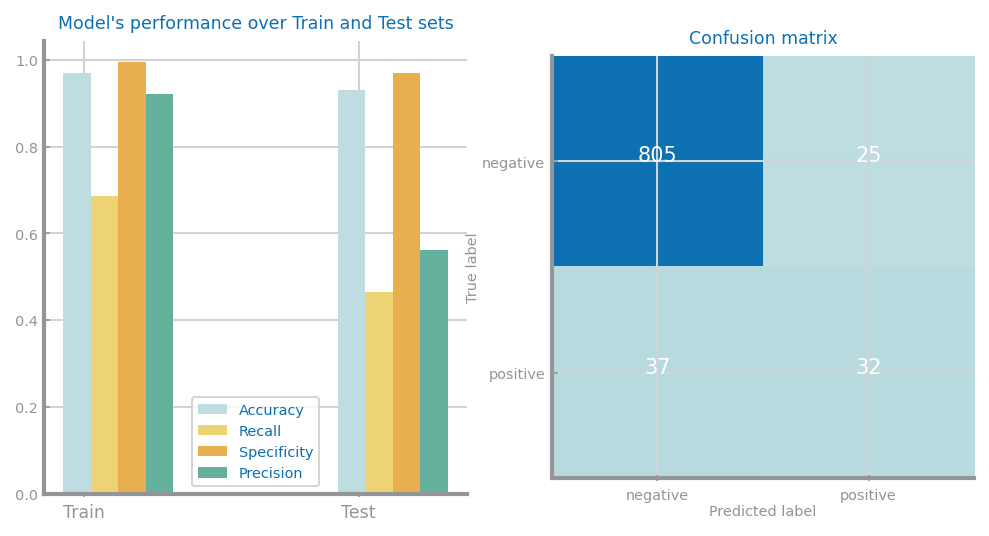

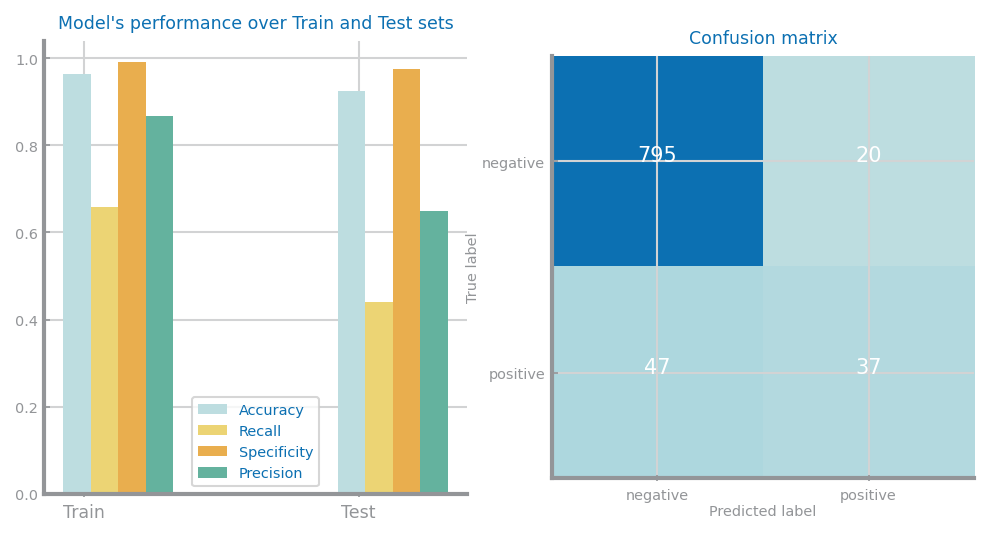

In [13]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Chi Feature Selection + Balancing

### Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FChi_B.csv', sep=';', header=None)    

### Holdout

In [15]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FChi_B.csv', sep=';', header=None)    
    
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [16]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.770
Accuracy score (Test): 0.773

Learning rate:  0.075
Accuracy score (Training): 0.780
Accuracy score (Test): 0.779

Learning rate:  0.1
Accuracy score (Training): 0.791
Accuracy score (Test): 0.792

Learning rate:  0.25
Accuracy score (Training): 0.828
Accuracy score (Test): 0.831

Learning rate:  0.5
Accuracy score (Training): 0.863
Accuracy score (Test): 0.856

Learning rate:  0.75
Accuracy score (Training): 0.867
Accuracy score (Test): 0.853

Learning rate:  1
Accuracy score (Training): 0.880
Accuracy score (Test): 0.872



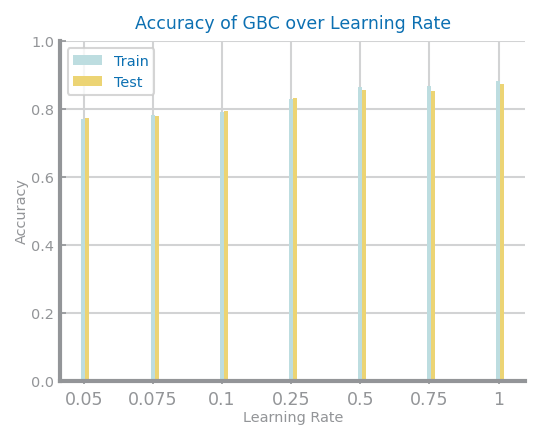

In [17]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_l_acc < gb_clf.score(X_test, y_test):
        best_l_acc = gb_clf.score(X_test, y_test)
        best_l = learning_rate

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Number of Estimators:  25
Accuracy score (Training): 0.890
Accuracy score (Test): 0.881

Number of Estimators:  50
Accuracy score (Training): 0.933
Accuracy score (Test): 0.921

Number of Estimators:  75
Accuracy score (Training): 0.950
Accuracy score (Test): 0.933

Number of Estimators:  100
Accuracy score (Training): 0.960
Accuracy score (Test): 0.939

Number of Estimators:  150
Accuracy score (Training): 0.971
Accuracy score (Test): 0.946

Number of Estimators:  200
Accuracy score (Training): 0.978
Accuracy score (Test): 0.948

Number of Estimators:  300
Accuracy score (Training): 0.982
Accuracy score (Test): 0.947



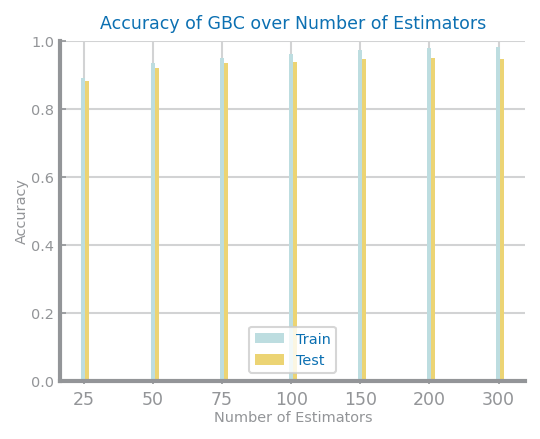

In [18]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Number of Estimators: ", no_estimators)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_e_acc < gb_clf.score(X_test, y_test):
        best_e_acc = gb_clf.score(X_test, y_test)
        best_e = no_estimators

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score (Training): 0.978
Accuracy score (Test): 0.948

Max Depth:  5
Accuracy score (Training): 0.999
Accuracy score (Test): 0.964

Max Depth:  6
Accuracy score (Training): 0.999
Accuracy score (Test): 0.963



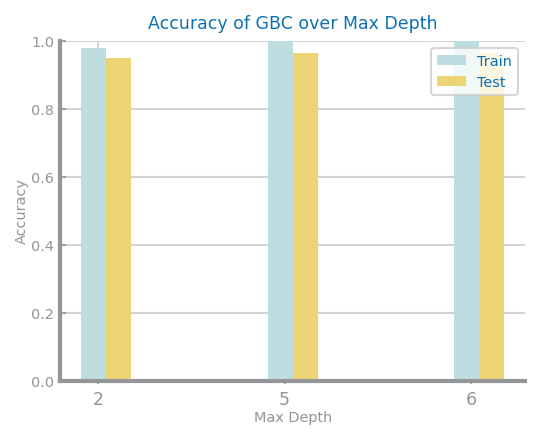

In [19]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", depth)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_d_acc < gb_clf.score(X_test, y_test):
        best_d_acc = gb_clf.score(X_test, y_test)
        best_d = depth

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final

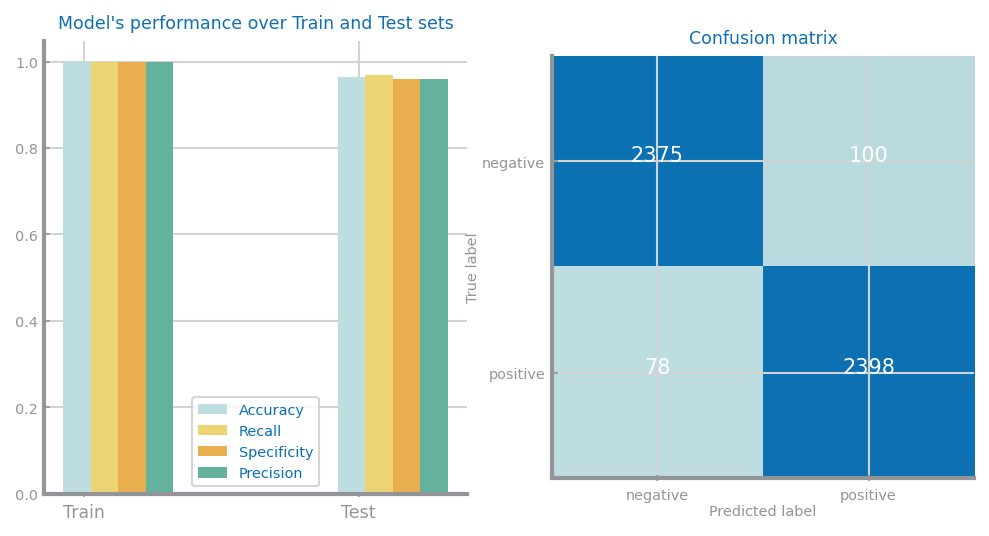

In [20]:
gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [21]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FChi_B.csv', sep=';', header=None)    
    
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

In [22]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.763

Learning rate:  0.075
Accuracy score: 0.784

Learning rate:  0.1
Accuracy score: 0.788

Learning rate:  0.25
Accuracy score: 0.829

Learning rate:  0.5
Accuracy score: 0.853

Learning rate:  0.75
Accuracy score: 0.863

Learning rate:  1
Accuracy score: 0.866



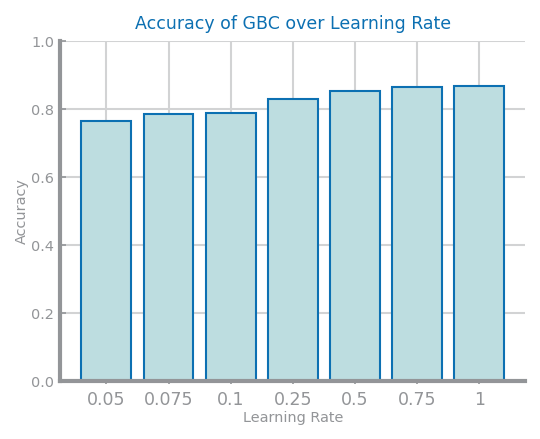

In [23]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_l_acc < scores.mean():
        best_l_acc = scores.mean()
        best_l = learning_rate
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  25
Accuracy score: 0.880

NUmber of Estimators:  50
Accuracy score: 0.918

NUmber of Estimators:  75
Accuracy score: 0.933

NUmber of Estimators:  100
Accuracy score: 0.941

NUmber of Estimators:  150
Accuracy score: 0.950

NUmber of Estimators:  200
Accuracy score: 0.951

NUmber of Estimators:  300
Accuracy score: 0.955



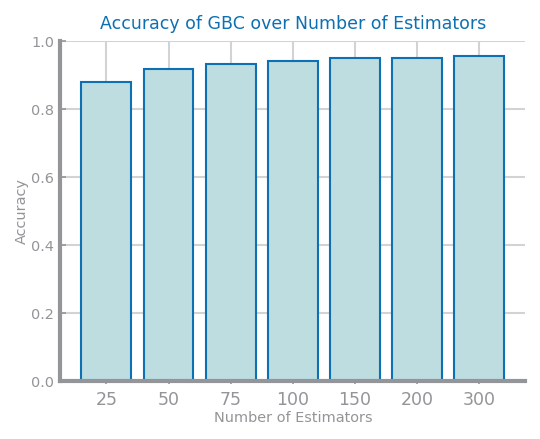

In [24]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", no_estimators)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_e_acc < scores.mean():
        best_e_acc = scores.mean()
        best_e = no_estimators

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score: 0.953

Max Depth:  5
Accuracy score: 0.964

Max Depth:  6
Accuracy score: 0.965



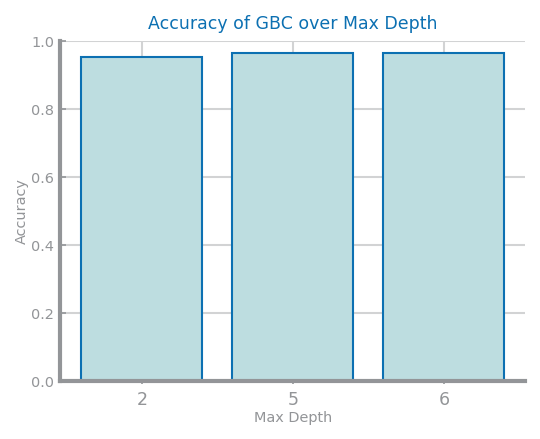

In [25]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", depth)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_d_acc < scores.mean():
        best_d_acc = scores.mean()
        best_d = depth

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.5

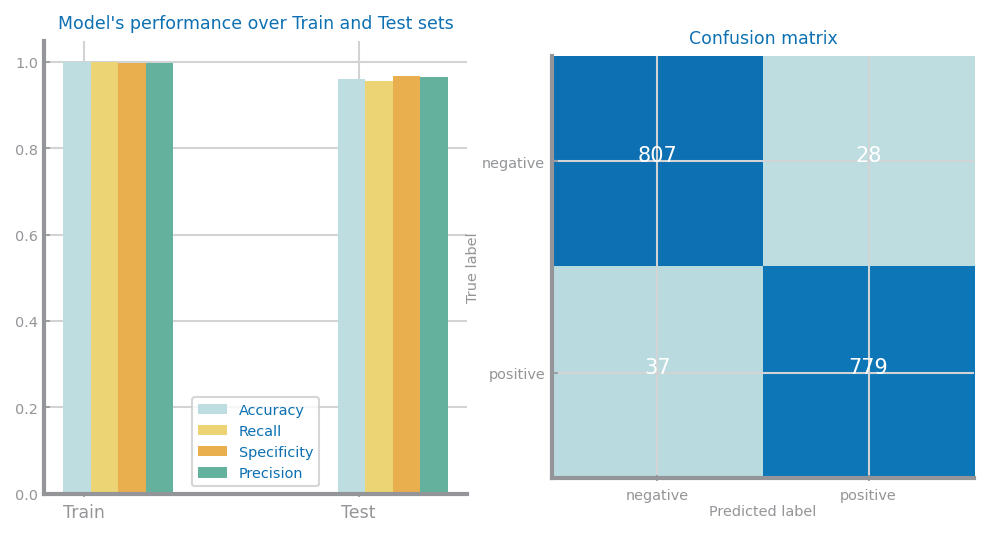

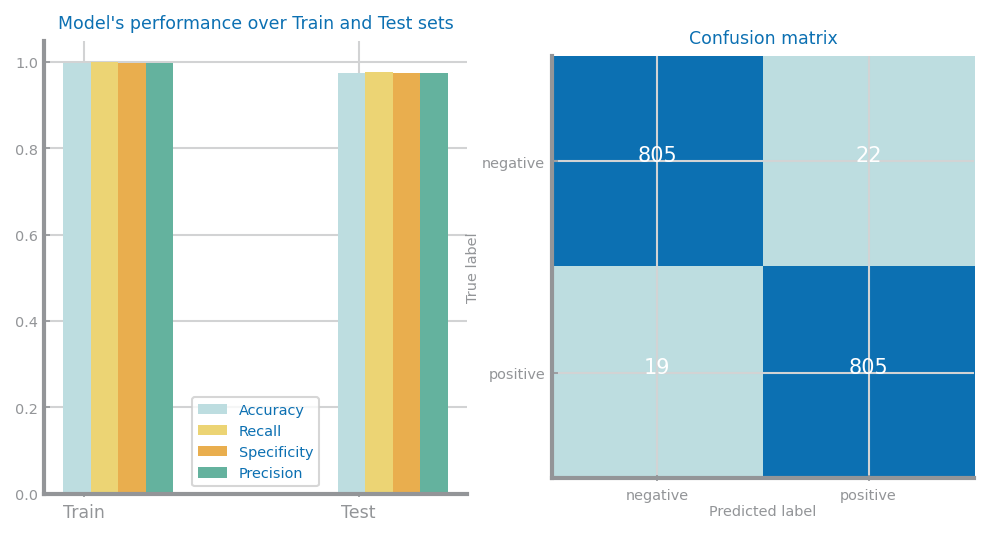

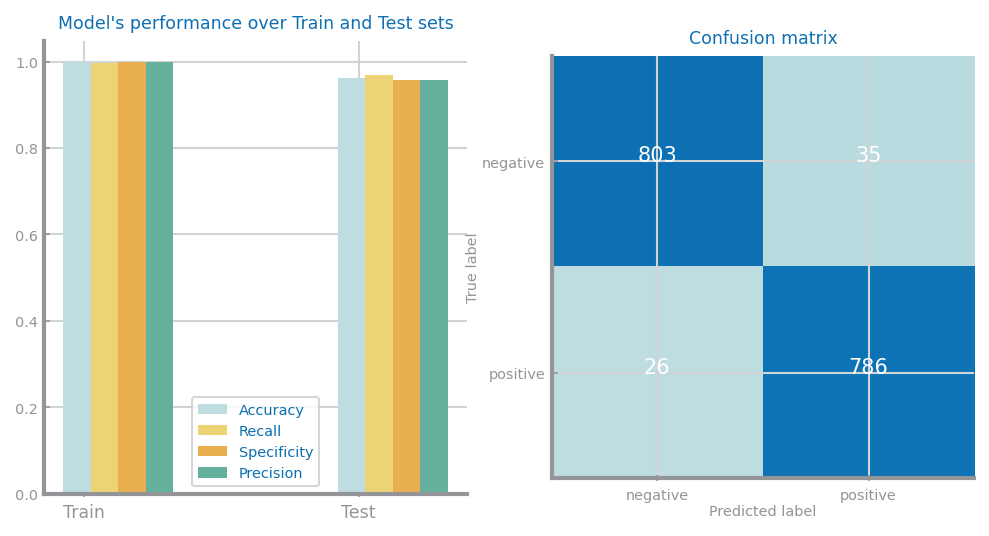

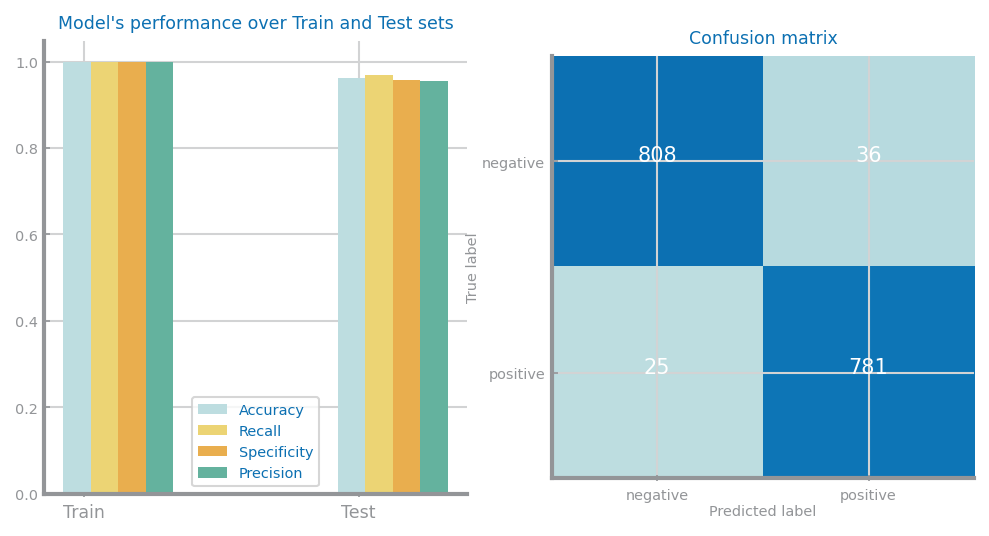

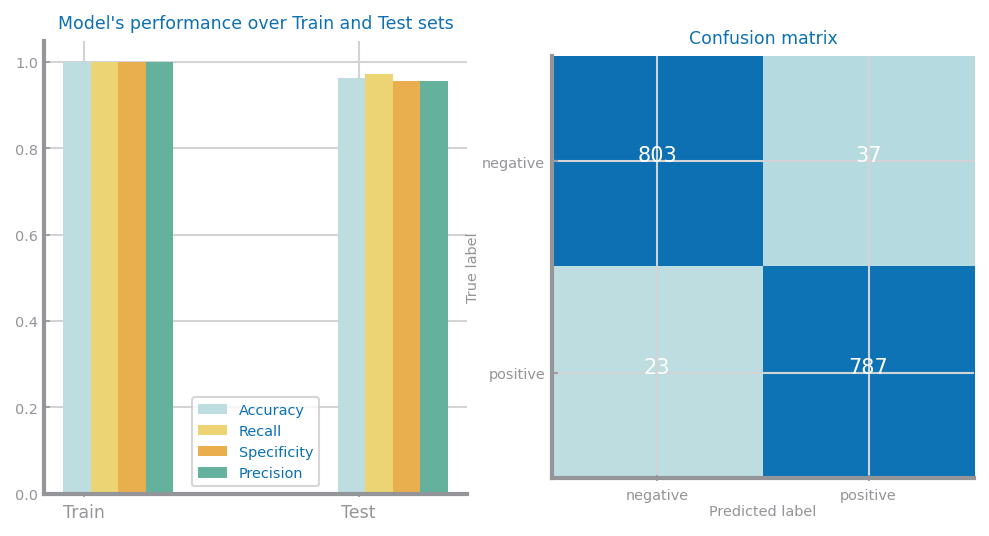

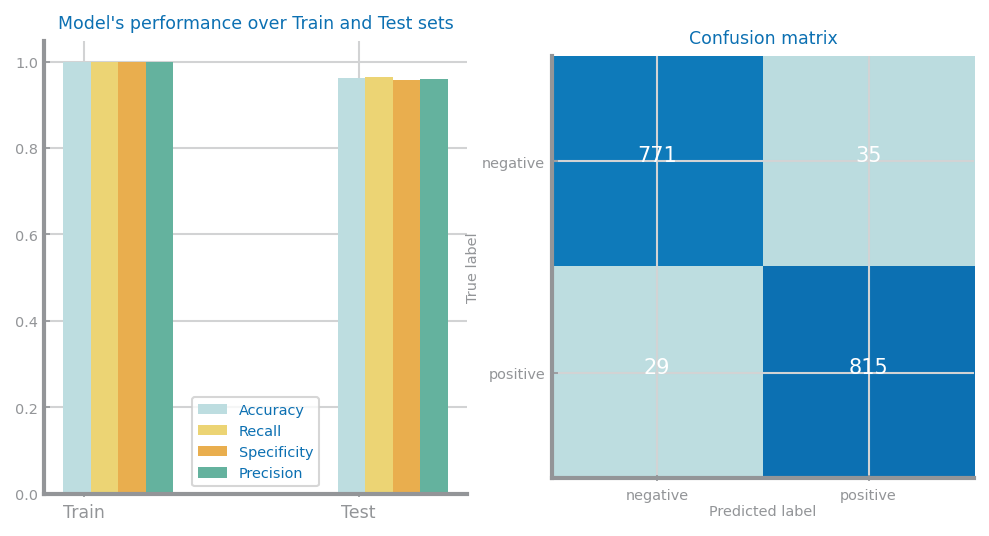

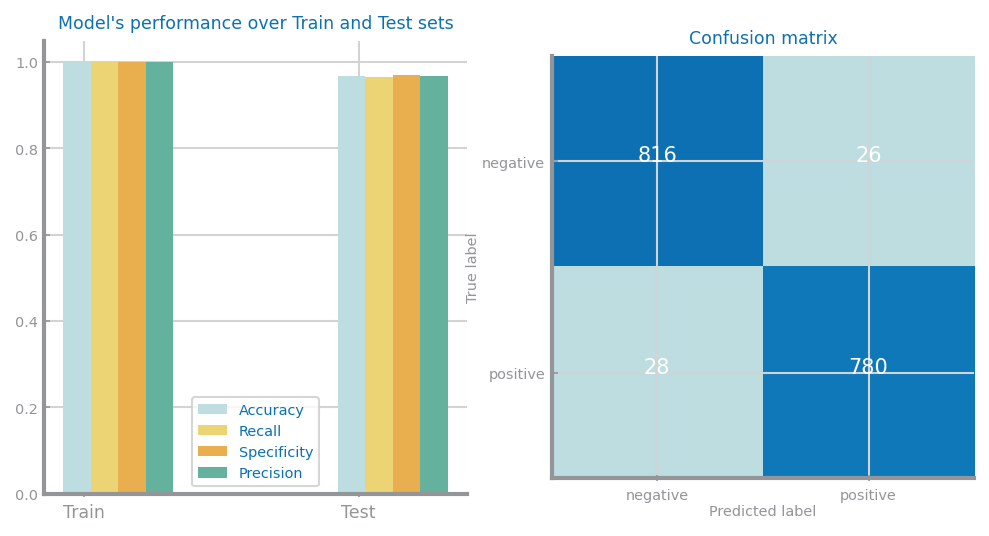

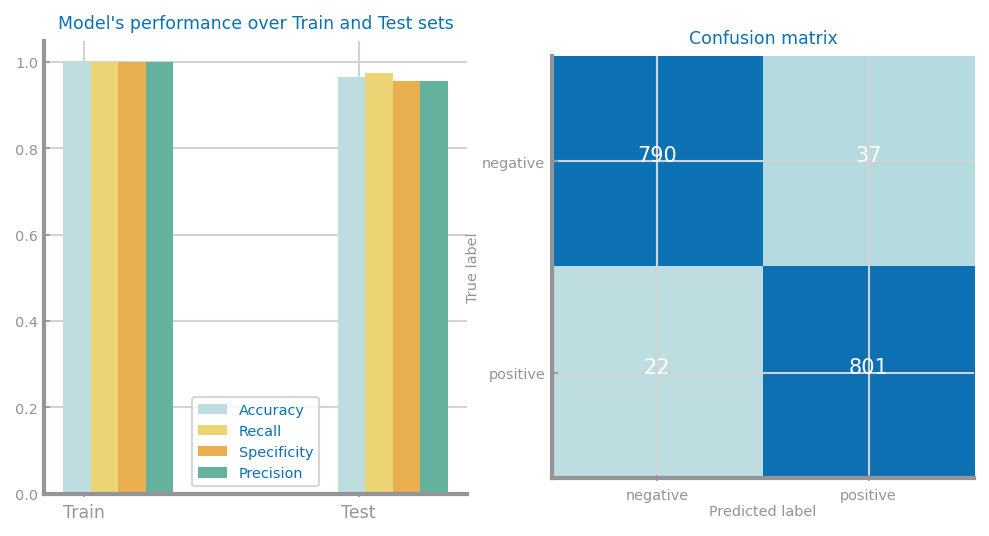

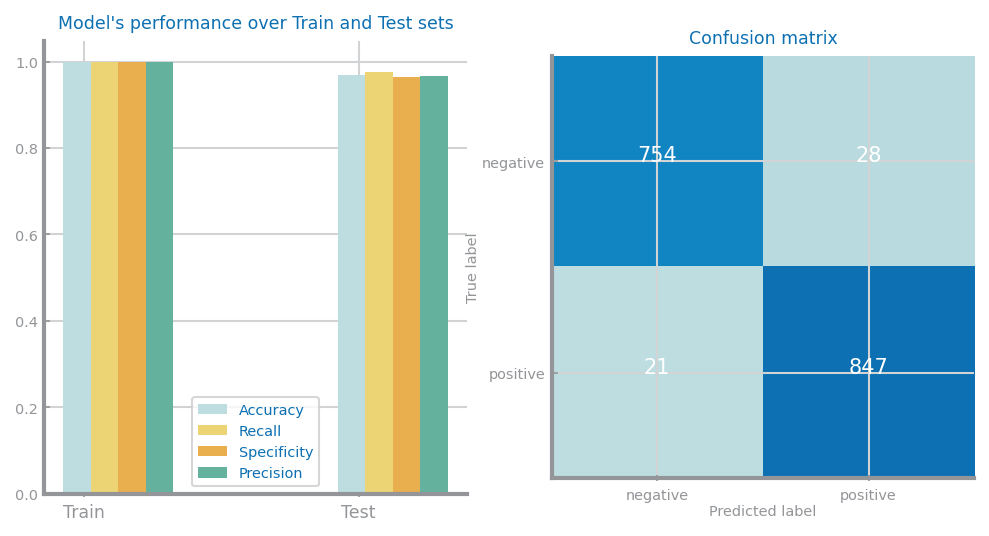

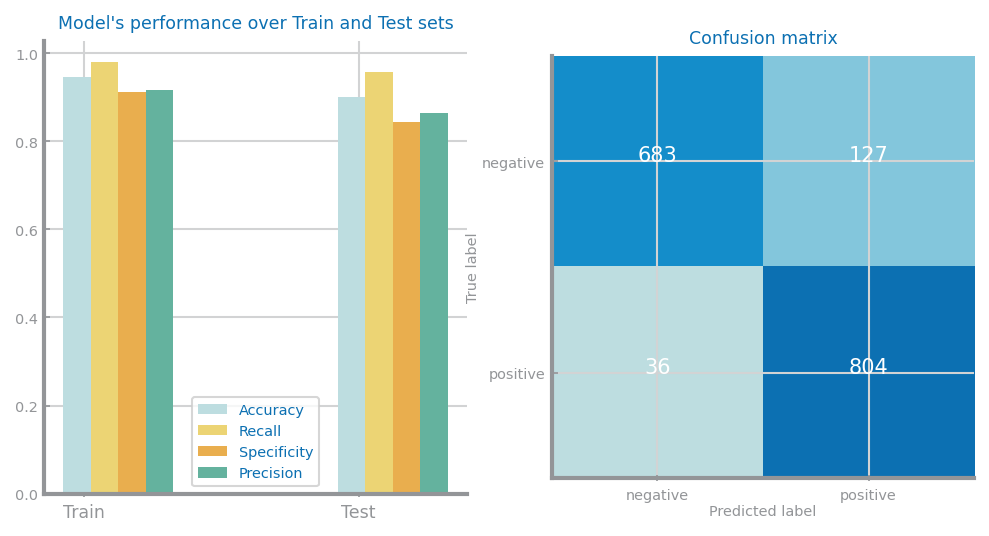

In [26]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Mutual + Balancing

### Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FMutual_B.csv', sep=';', header=None)    

### Holdout

In [28]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FMutual_B.csv', sep=';', header=None)    
    
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [29]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.761
Accuracy score (Test): 0.762

Learning rate:  0.075
Accuracy score (Training): 0.785
Accuracy score (Test): 0.789

Learning rate:  0.1
Accuracy score (Training): 0.783
Accuracy score (Test): 0.788

Learning rate:  0.25
Accuracy score (Training): 0.829
Accuracy score (Test): 0.832

Learning rate:  0.5
Accuracy score (Training): 0.845
Accuracy score (Test): 0.849

Learning rate:  0.75
Accuracy score (Training): 0.863
Accuracy score (Test): 0.867

Learning rate:  1
Accuracy score (Training): 0.876
Accuracy score (Test): 0.870



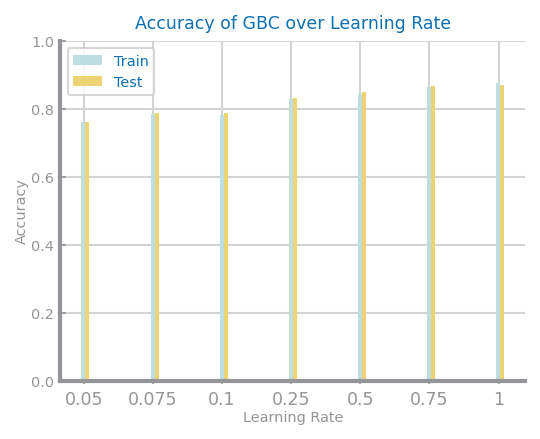

In [30]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_l_acc < gb_clf.score(X_test, y_test):
        best_l_acc = gb_clf.score(X_test, y_test)
        best_l = learning_rate

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Number of Estimators:  25
Accuracy score (Training): 0.886
Accuracy score (Test): 0.880

Number of Estimators:  50
Accuracy score (Training): 0.931
Accuracy score (Test): 0.913

Number of Estimators:  75
Accuracy score (Training): 0.947
Accuracy score (Test): 0.928

Number of Estimators:  100
Accuracy score (Training): 0.957
Accuracy score (Test): 0.938

Number of Estimators:  150
Accuracy score (Training): 0.970
Accuracy score (Test): 0.944

Number of Estimators:  200
Accuracy score (Training): 0.976
Accuracy score (Test): 0.947

Number of Estimators:  300
Accuracy score (Training): 0.978
Accuracy score (Test): 0.949



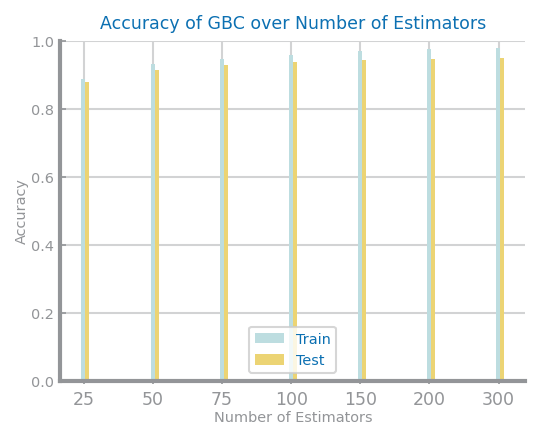

In [31]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Number of Estimators: ", no_estimators)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_e_acc < gb_clf.score(X_test, y_test):
        best_e_acc = gb_clf.score(X_test, y_test)
        best_e = no_estimators

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score (Training): 0.978
Accuracy score (Test): 0.949

Max Depth:  5
Accuracy score (Training): 0.999
Accuracy score (Test): 0.962

Max Depth:  6
Accuracy score (Training): 0.999
Accuracy score (Test): 0.963



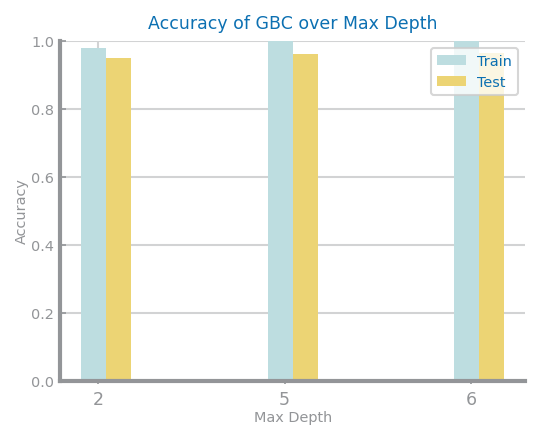

In [32]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", depth)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_d_acc < gb_clf.score(X_test, y_test):
        best_d_acc = gb_clf.score(X_test, y_test)
        best_d = depth

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final

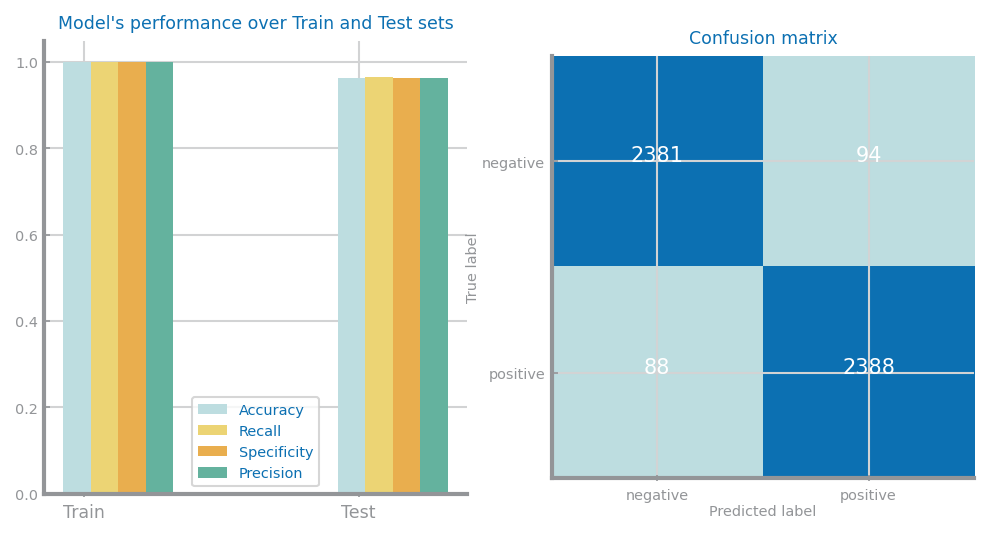

In [33]:
gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [34]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FMutual_B.csv', sep=';', header=None)    
    
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

In [35]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.766

Learning rate:  0.075
Accuracy score: 0.785

Learning rate:  0.1
Accuracy score: 0.787

Learning rate:  0.25
Accuracy score: 0.824

Learning rate:  0.5
Accuracy score: 0.851

Learning rate:  0.75
Accuracy score: 0.856

Learning rate:  1
Accuracy score: 0.868



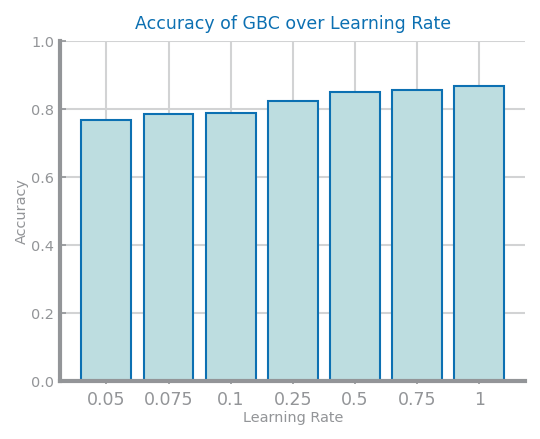

In [36]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_l_acc < scores.mean():
        best_l_acc = scores.mean()
        best_l = learning_rate
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  25
Accuracy score: 0.882

NUmber of Estimators:  50
Accuracy score: 0.914

NUmber of Estimators:  75
Accuracy score: 0.930

NUmber of Estimators:  100
Accuracy score: 0.941

NUmber of Estimators:  150
Accuracy score: 0.948

NUmber of Estimators:  200
Accuracy score: 0.946

NUmber of Estimators:  300
Accuracy score: 0.955



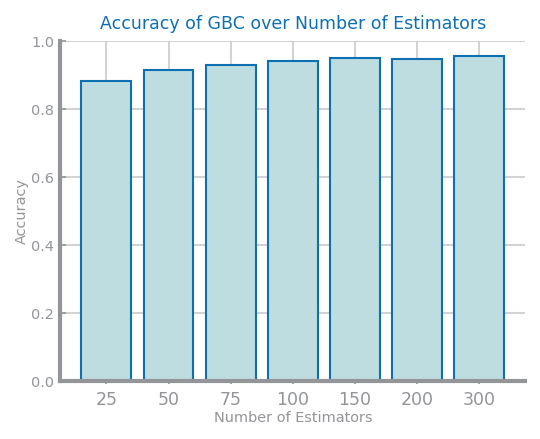

In [37]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", no_estimators)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_e_acc < scores.mean():
        best_e_acc = scores.mean()
        best_e = no_estimators

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score: 0.953

Max Depth:  5
Accuracy score: 0.963

Max Depth:  6
Accuracy score: 0.966



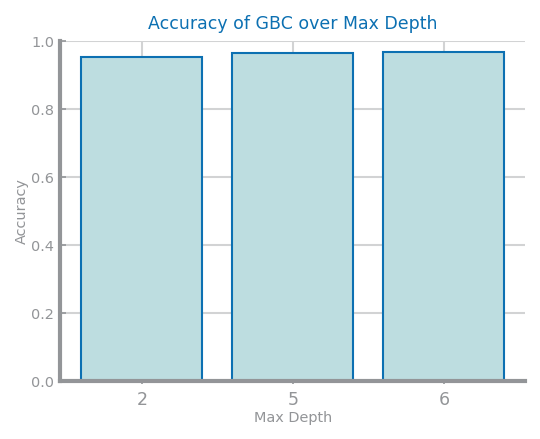

In [38]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", depth)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_d_acc < scores.mean():
        best_d_acc = scores.mean()
        best_d = depth

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.5

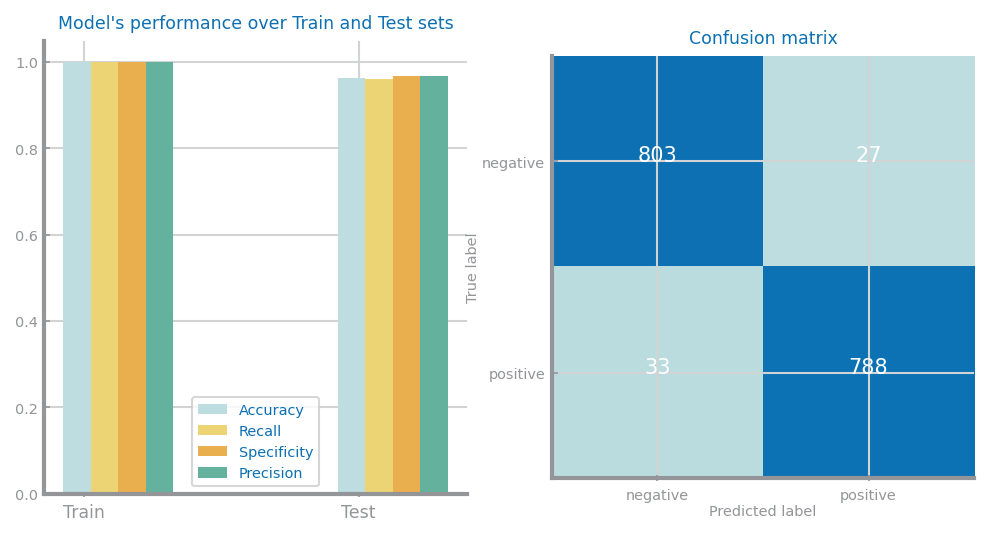

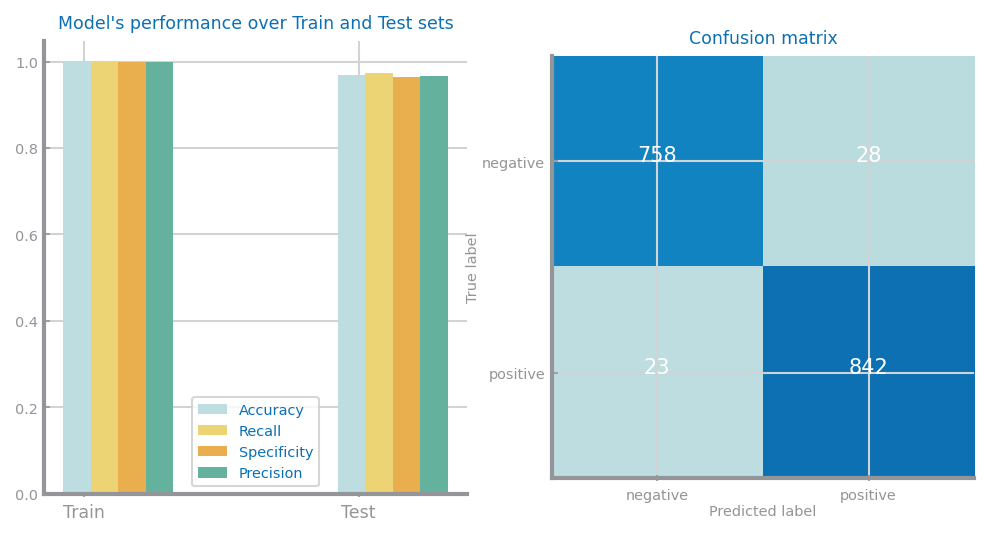

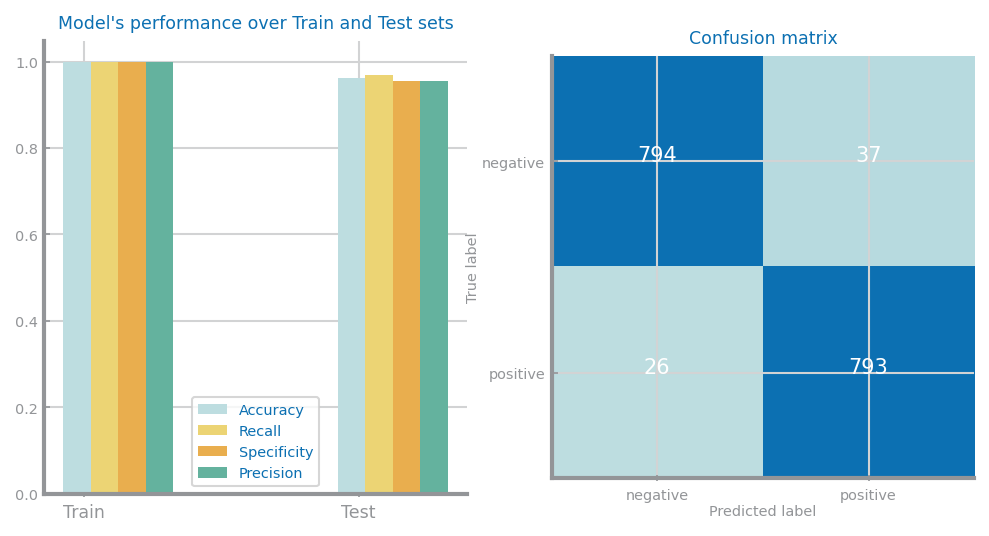

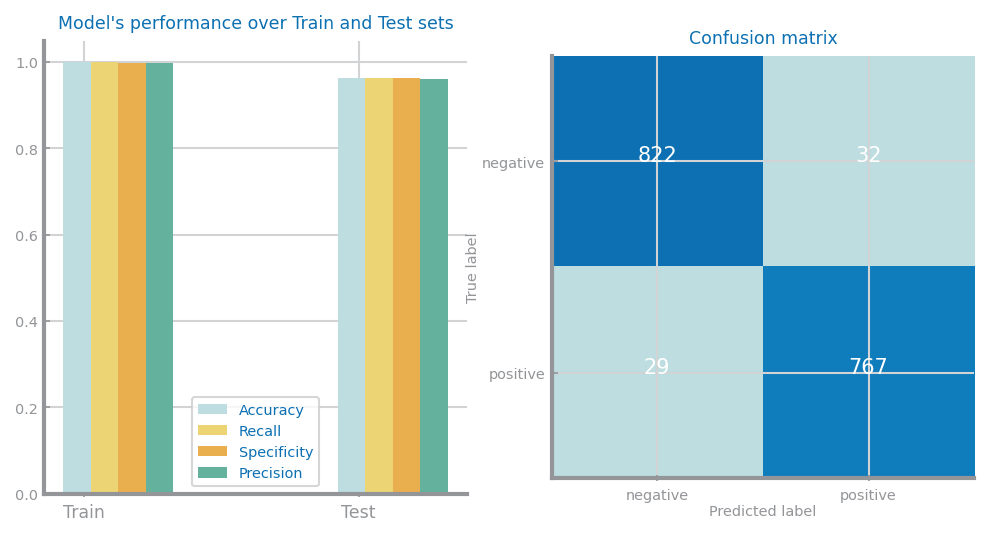

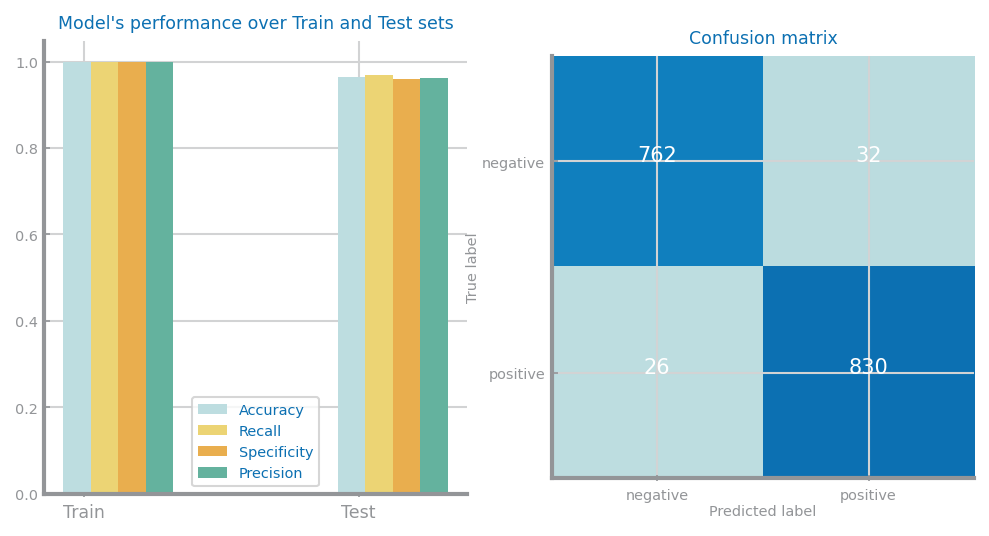

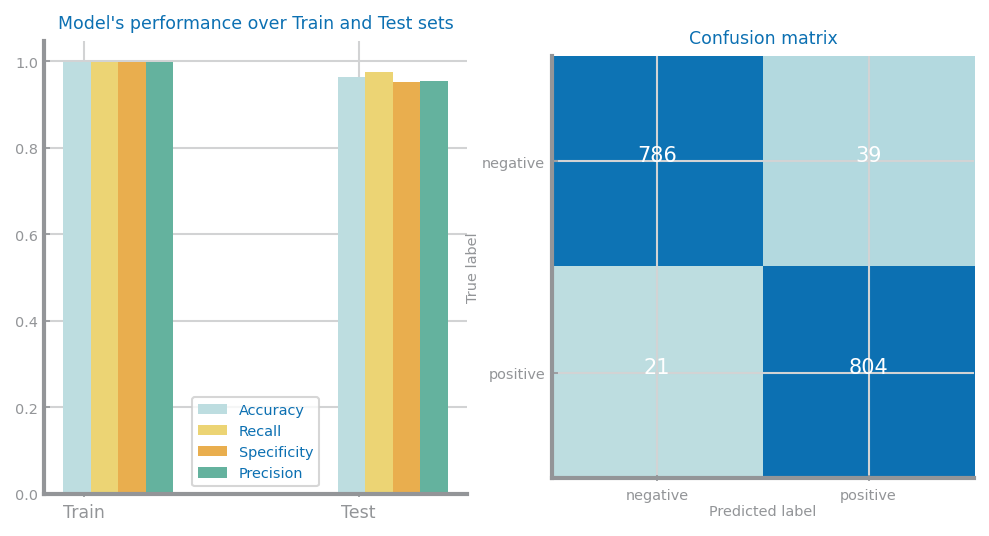

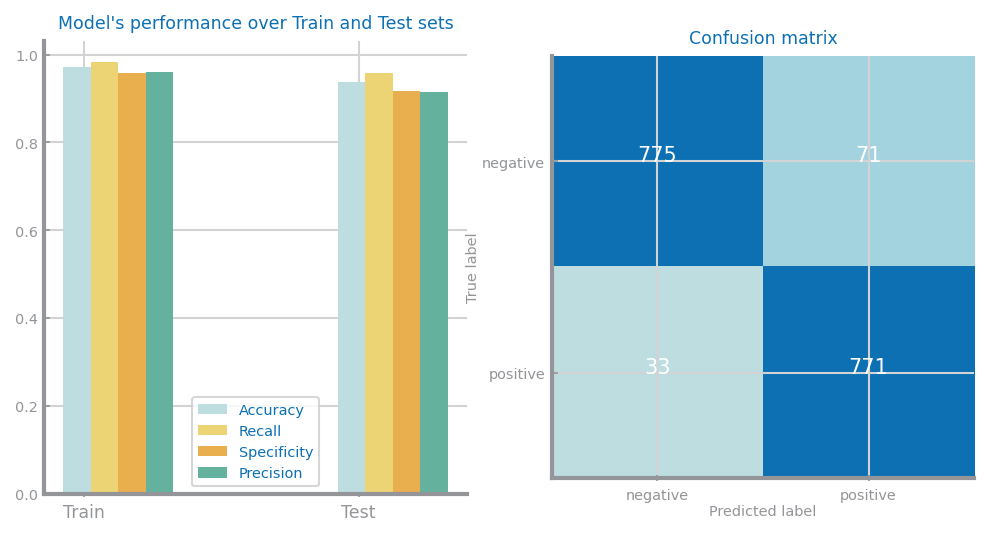

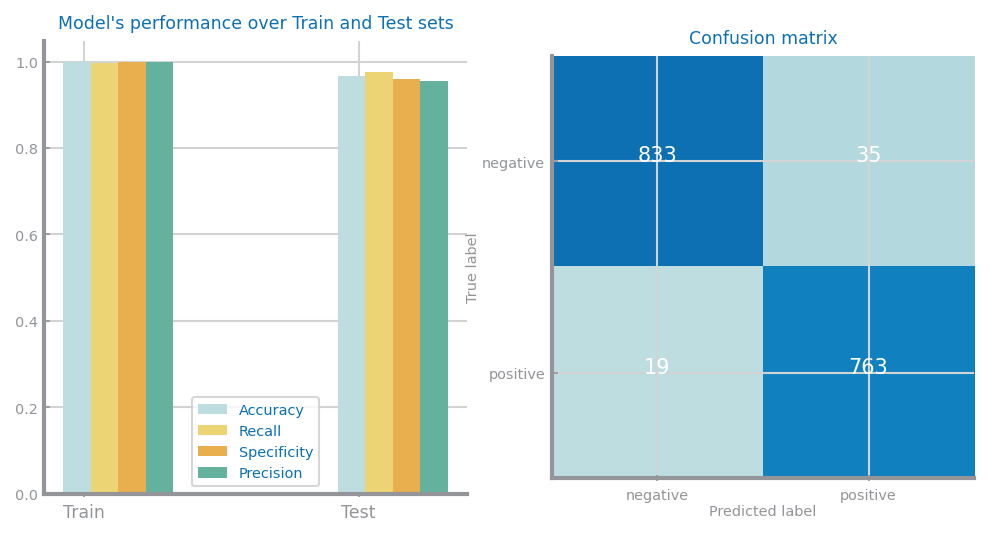

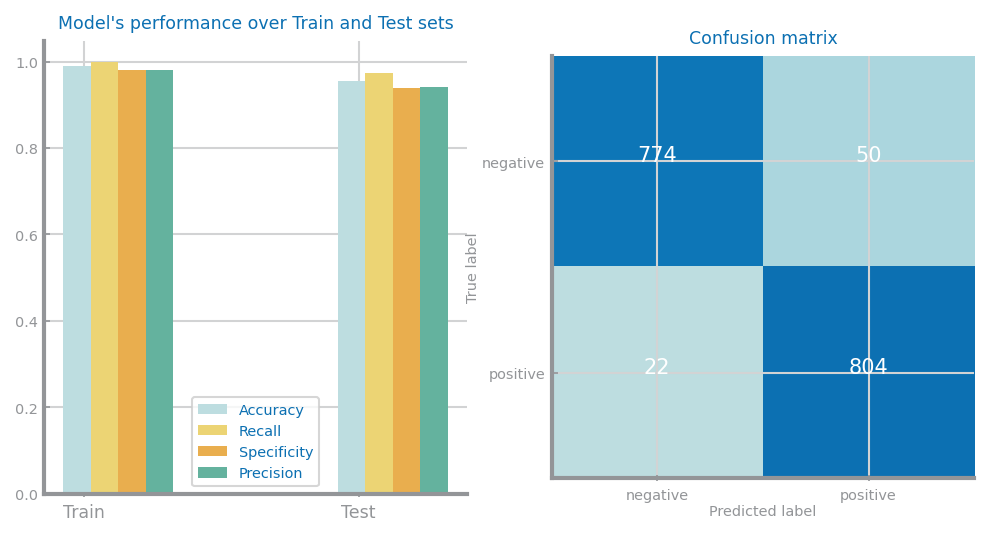

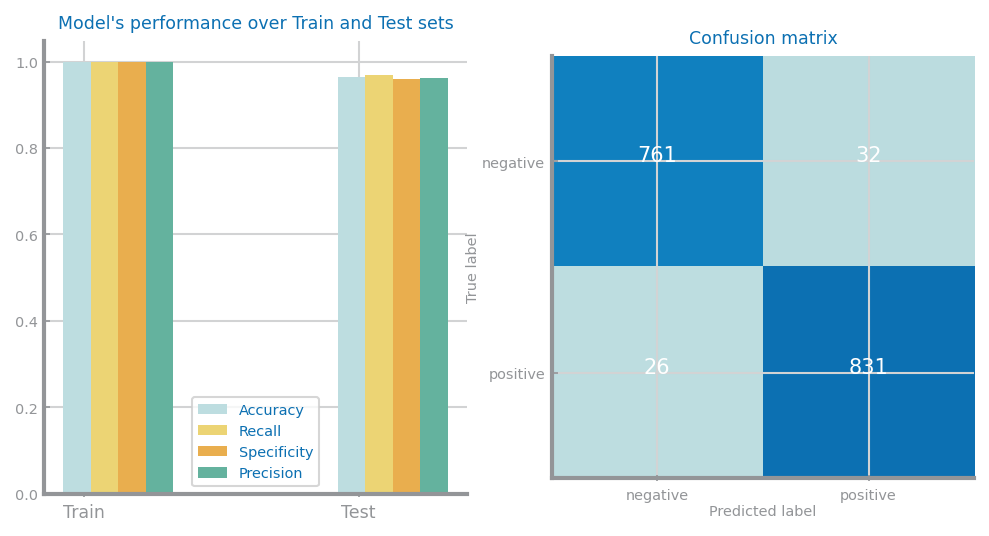

In [39]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Reduced Chi Balanced

### Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_B_reduced32.csv', sep=';', header=None)    

### Holdout

In [41]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_B_reduced32.csv', sep=';', header=None)        
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [42]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.777
Accuracy score (Test): 0.778

Learning rate:  0.075
Accuracy score (Training): 0.785
Accuracy score (Test): 0.781

Learning rate:  0.1
Accuracy score (Training): 0.788
Accuracy score (Test): 0.785

Learning rate:  0.25
Accuracy score (Training): 0.830
Accuracy score (Test): 0.829

Learning rate:  0.5
Accuracy score (Training): 0.848
Accuracy score (Test): 0.845

Learning rate:  0.75
Accuracy score (Training): 0.860
Accuracy score (Test): 0.857

Learning rate:  1
Accuracy score (Training): 0.869
Accuracy score (Test): 0.869



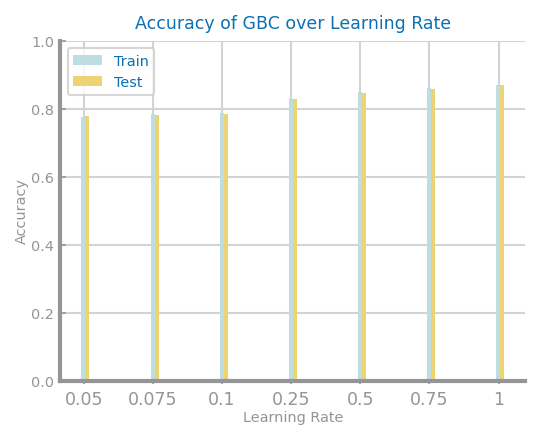

In [43]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_l_acc < gb_clf.score(X_test, y_test):
        best_l_acc = gb_clf.score(X_test, y_test)
        best_l = learning_rate

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Number of Estimators:  25
Accuracy score (Training): 0.890
Accuracy score (Test): 0.881

Number of Estimators:  50
Accuracy score (Training): 0.920
Accuracy score (Test): 0.906

Number of Estimators:  75
Accuracy score (Training): 0.939
Accuracy score (Test): 0.924

Number of Estimators:  100
Accuracy score (Training): 0.953
Accuracy score (Test): 0.930

Number of Estimators:  150
Accuracy score (Training): 0.965
Accuracy score (Test): 0.939

Number of Estimators:  200
Accuracy score (Training): 0.971
Accuracy score (Test): 0.938

Number of Estimators:  300
Accuracy score (Training): 0.972
Accuracy score (Test): 0.940



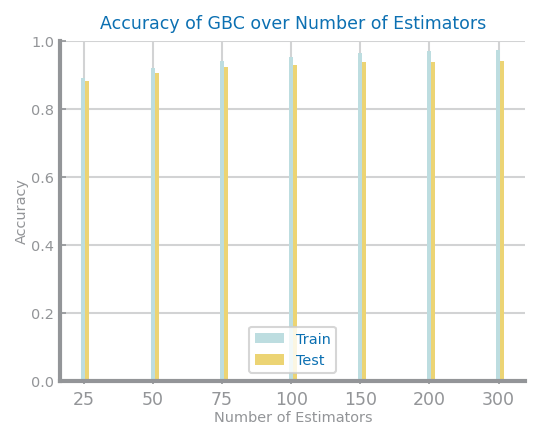

In [44]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Number of Estimators: ", no_estimators)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_e_acc < gb_clf.score(X_test, y_test):
        best_e_acc = gb_clf.score(X_test, y_test)
        best_e = no_estimators

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score (Training): 0.972
Accuracy score (Test): 0.940

Max Depth:  5
Accuracy score (Training): 0.999
Accuracy score (Test): 0.954

Max Depth:  6
Accuracy score (Training): 0.999
Accuracy score (Test): 0.958



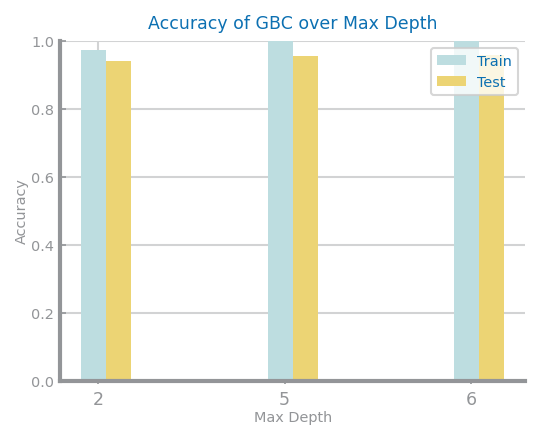

In [45]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", depth)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))
    
    if best_d_acc < gb_clf.score(X_test, y_test):
        best_d_acc = gb_clf.score(X_test, y_test)
        best_d = depth

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final

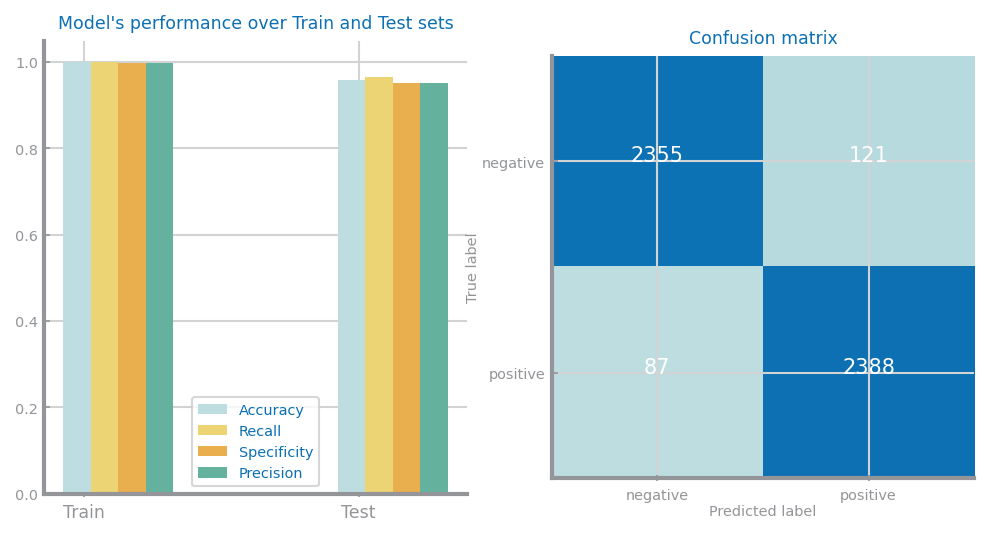

In [46]:
gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [47]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_B_reduced32.csv', sep=';', header=None)        
y: np.ndarray = data.pop(len(data.columns)-1).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

In [48]:
best_l_acc= 0
best_e_acc = 0
best_d_acc = 0

best_l = 0
best_e = 0
best_d = 0

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.772

Learning rate:  0.075
Accuracy score: 0.780

Learning rate:  0.1
Accuracy score: 0.785

Learning rate:  0.25
Accuracy score: 0.829

Learning rate:  0.5
Accuracy score: 0.850

Learning rate:  0.75
Accuracy score: 0.864

Learning rate:  1
Accuracy score: 0.865



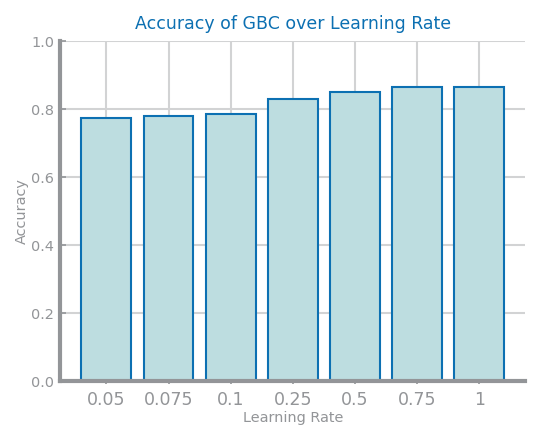

In [49]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_l_acc < scores.mean():
        best_l_acc = scores.mean()
        best_l = learning_rate
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  25
Accuracy score: 0.875

NUmber of Estimators:  50
Accuracy score: 0.905

NUmber of Estimators:  75
Accuracy score: 0.919

NUmber of Estimators:  100
Accuracy score: 0.934

NUmber of Estimators:  150
Accuracy score: 0.941

NUmber of Estimators:  200
Accuracy score: 0.944

NUmber of Estimators:  300
Accuracy score: 0.949



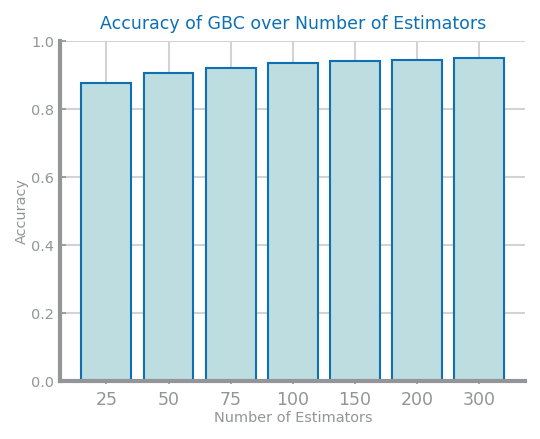

In [50]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=best_l, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", no_estimators)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_e_acc < scores.mean():
        best_e_acc = scores.mean()
        best_e = no_estimators

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  2
Accuracy score: 0.948

Max Depth:  5
Accuracy score: 0.960

Max Depth:  6
Accuracy score: 0.953



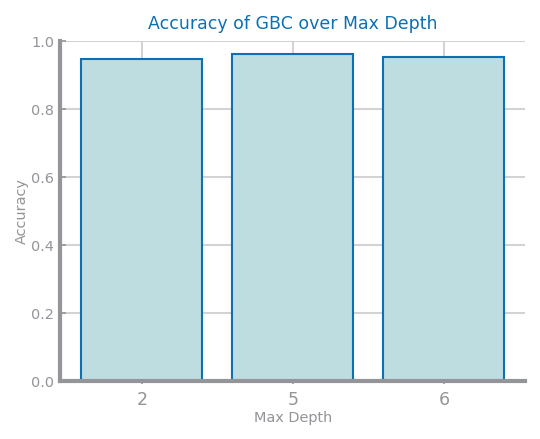

In [51]:
max_depth = [2, 5, 6]

xValues = ["2", "5", "6"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", depth)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
    if best_d_acc < scores.mean():
        best_d_acc = scores.mean()
        best_d = depth

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.5

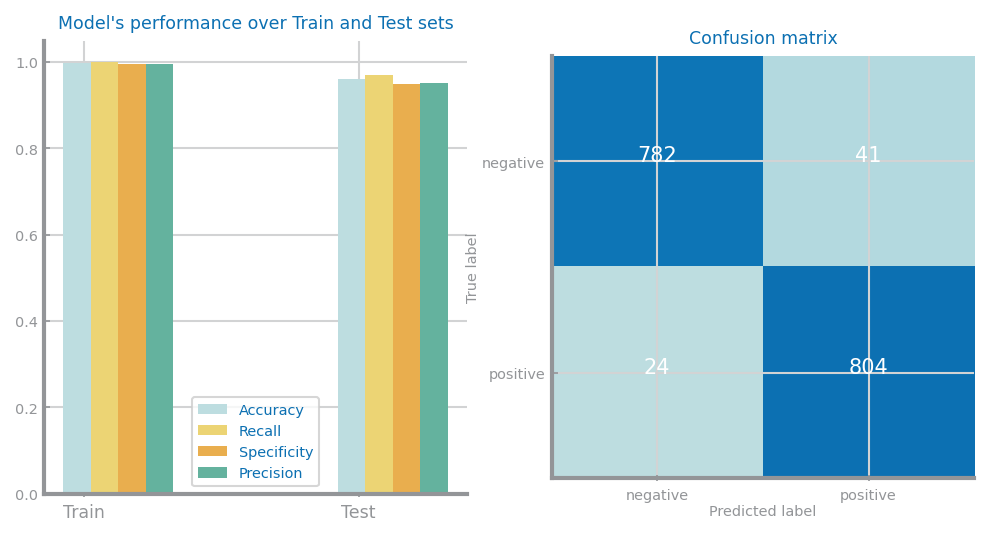

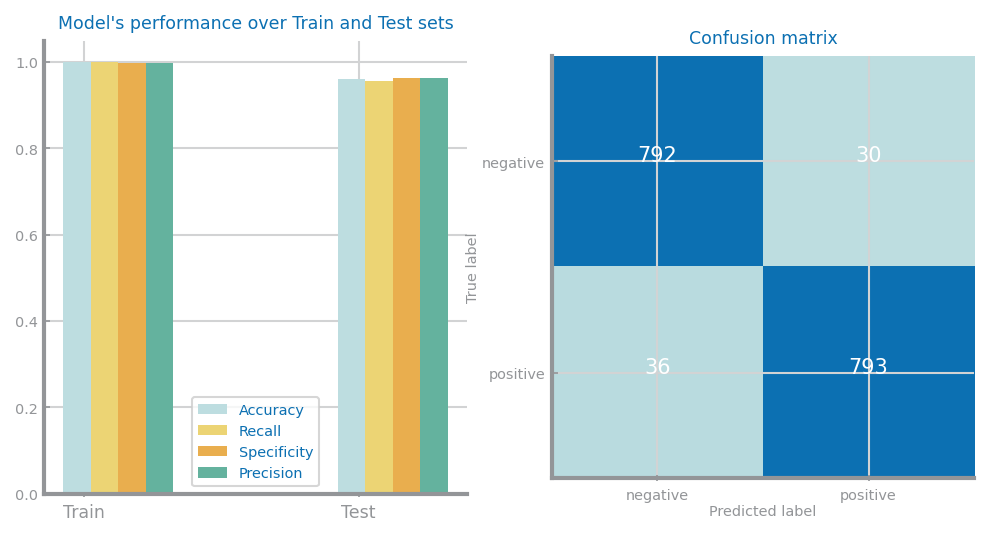

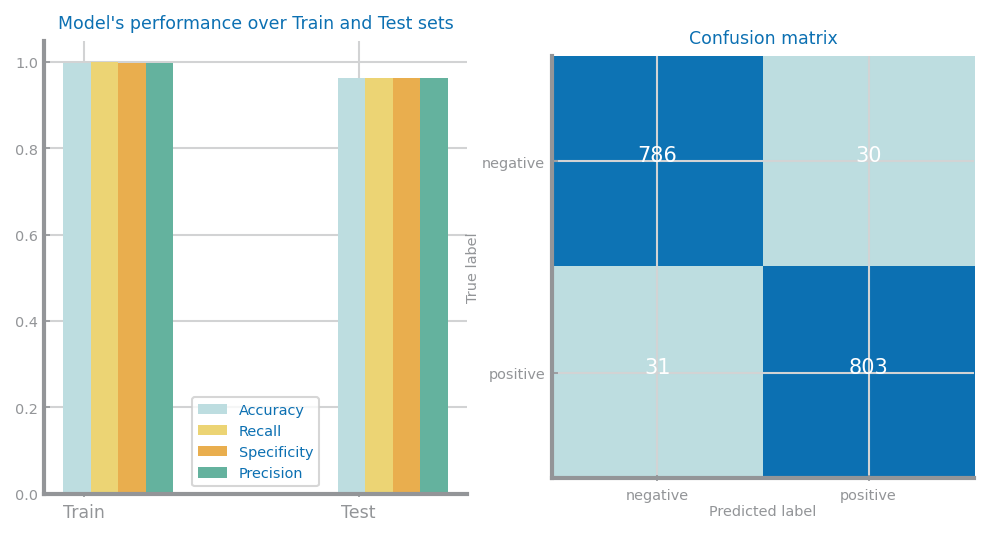

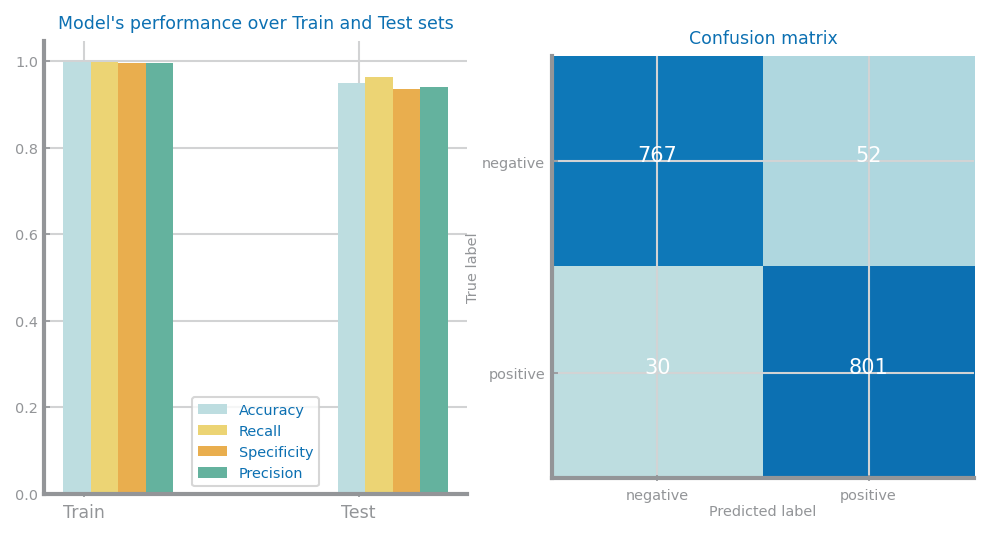

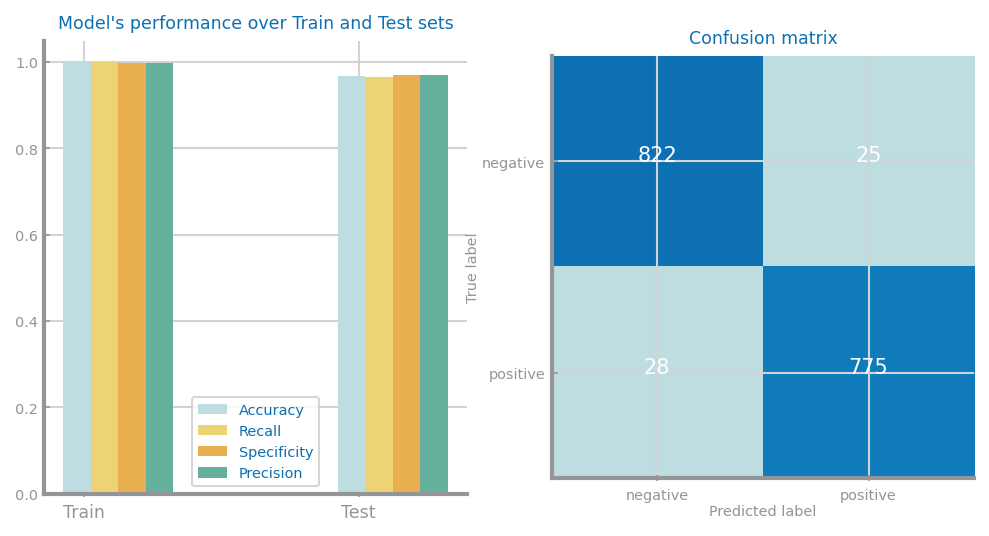

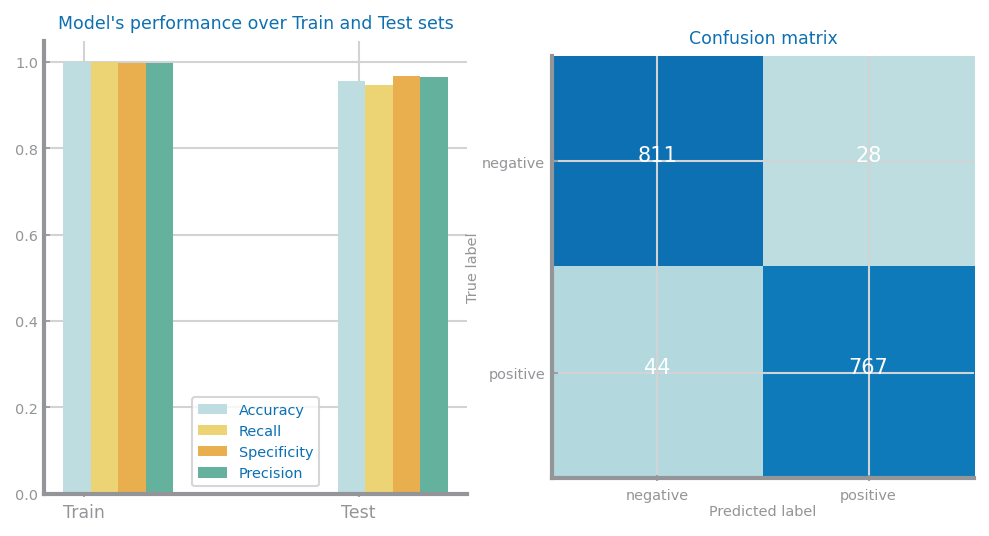

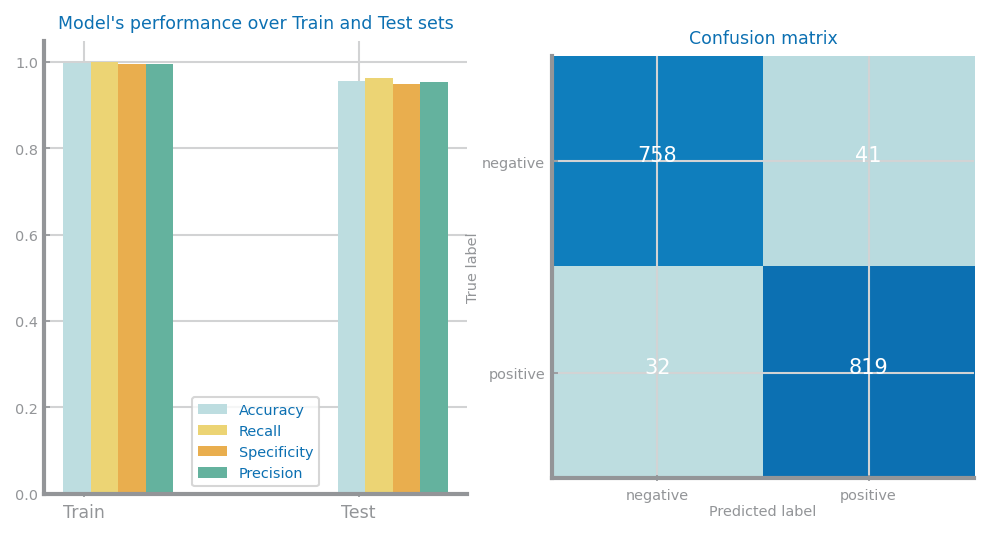

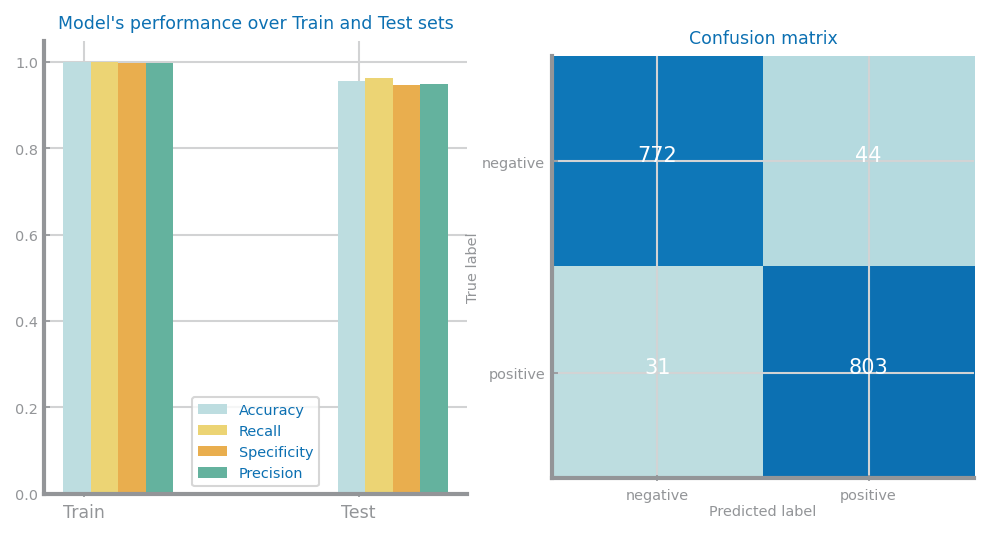

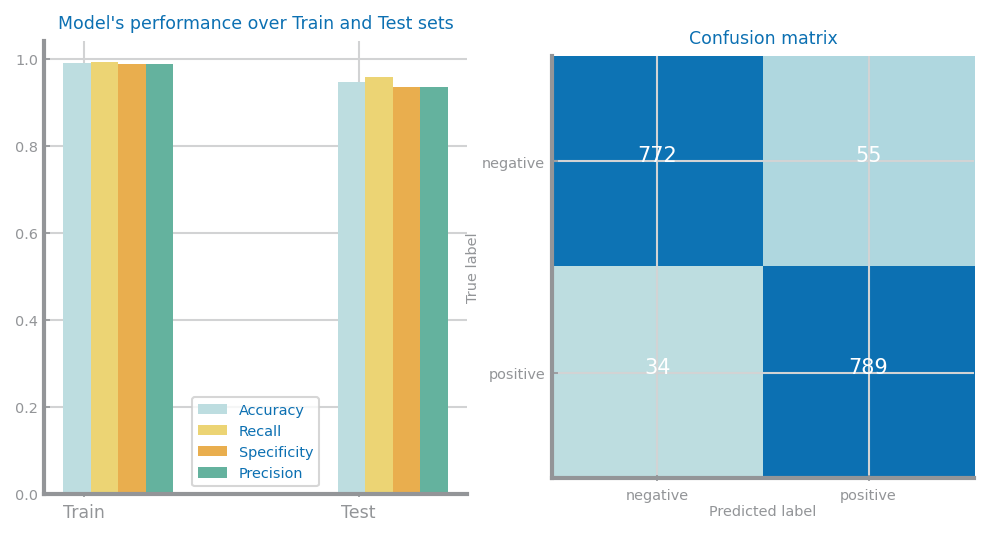

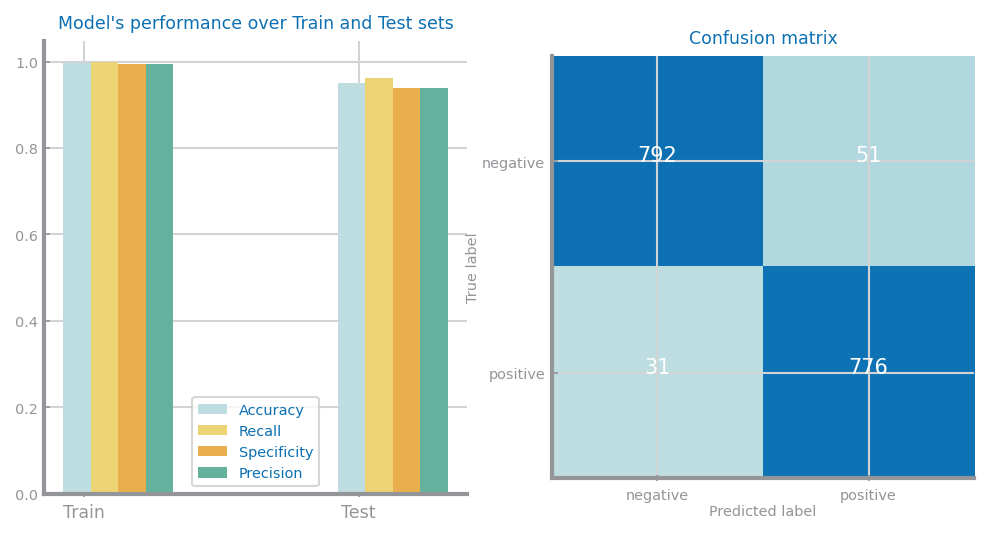

In [52]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=best_e, learning_rate=best_l, max_features=None, max_depth=best_d, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>